# PPG Field Study Dataset
## 0/ Imports des modules

In [1]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt

## 1/ Chargement des données

In [2]:
path = "./data/S1/S1.pkl"

In [3]:
with open(path, "rb") as f:
    data = pickle.load(f, encoding="latin-1")

## 2/ Analyse des données

In [4]:
data.keys()

dict_keys(['rpeaks', 'signal', 'label', 'activity', 'questionnaire', 'subject'])

In [5]:
pd.DataFrame(data["signal"])

,chest,wrist
ACC,"[[0.8564000129699707, -0.06779998540878296, -0...","[[-0.765625, -0.078125, 0.671875], [-0.765625,..."
ECG,"[[0.015609741210937498], [0.01812744140625], [...",NaN
EMG,"[[-1.5], [-1.5], [-1.5], [-1.5], [-1.5], [-1.5...",NaN
EDA,"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[4.722437], [4.728843], [4.718594], [4.717312..."
Temp,"[[-273.15], [-273.15], [-273.15], [-273.15], [...",NaN
Resp,"[[4.44183349609375], [4.45098876953125], [4.47...",NaN
BVP,NaN,"[[7.28], [6.33], [5.46], [4.6], [3.74], [2.86]..."
TEMP,NaN,"[[32.13], [32.16], [32.16], [32.16], [32.16], ..."


## 3/ Création de DataFrame

In [6]:
dfs  = []
pbms = []
oks  = []
for key in data.keys():
    try:
        df = pd.DataFrame(data[key])
        #df = df.dropna()
        dfs.append(df)
        oks.append(key)
    except Exception as e:
        pbms.append(key + str(e))
print(f"clefs ok = {oks}")
print(f"clefs avec un pbms = {pbms}")

clefs ok = ['rpeaks', 'signal', 'label', 'activity']
clefs avec un pbms = ['questionnaireIf using all scalar values, you must pass an index', 'subjectDataFrame constructor not properly called!']


### 3.1/ Regarder les DataFrames

In [7]:
for df in dfs:
    print(df)

0
0          240
1         1174
2         2128
3         3099
4         3907
...        ...
11426  6446343
11427  6446825
11428  6447292
11429  6447748
11430  6448224

[11431 rows x 1 columns]
                                                  chest  \
ACC   [[0.8564000129699707, -0.06779998540878296, -0...   
ECG   [[0.015609741210937498], [0.01812744140625], [...   
EMG   [[-1.5], [-1.5], [-1.5], [-1.5], [-1.5], [-1.5...   
EDA   [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....   
Temp  [[-273.15], [-273.15], [-273.15], [-273.15], [...   
Resp  [[4.44183349609375], [4.45098876953125], [4.47...   
BVP                                                 NaN   
TEMP                                                NaN   

                                                  wrist  
ACC   [[-0.765625, -0.078125, 0.671875], [-0.765625,...  
ECG                                                 NaN  
EMG                                                 NaN  
EDA   [[4.722437], [4.728843], [4.718594], 

In [8]:
dfchest = dfs[1]['chest'].dropna()
print("Shape of Chest")
for dfc in dfchest:
    print(dfc.shape)
dfwrist = dfs[1]['wrist'].dropna()
print("\nShape of Wrist")
for dfw in dfwrist:
    print(dfw.shape[0])

Shape of Chest
(6448400, 3)
(6448400, 1)
(6448400, 1)
(6448400, 1)
(6448400, 1)
(6448400, 1)

Shape of Wrist
294784
36848
589568
36848


In [22]:
cleanedData = []
rpeaks = dfs[0]
indexes = {
    '0': 'accChest',
    '1': 'ecg',
    '2': 'resp',
    '3': 'accWrist',
    '4': 'bvp',
    '5': 'eda',
    '6': 'temp'
}
accChest = []
for accElement in dfchest['ACC']:
    accChest.append(accElement)
cleanedData.append(accChest)

ecg = []
for ecgElement in dfchest['ECG']:
    ecg.append(ecgElement)
cleanedData.append(ecg)

resp = []
for respElement in dfchest['Resp']:
    resp.append(respElement)
cleanedData.append(resp)

accWrist = []
for accElement in dfwrist['ACC']:
    accWrist.append(accElement)
cleanedData.append(accWrist)

bvp = []
for bvpElement in dfwrist['BVP']:
    bvp.append(bvpElement)
cleanedData.append(bvp)

eda = []
for edaElement in dfwrist['EDA']:
    eda.append(edaElement)
cleanedData.append(eda)

temp = []
for tempElement in dfwrist['TEMP']:
    temp.append(tempElement)
cleanedData.append(temp)


In [19]:
pd.DataFrame(cleanedData[6]).sample(10)

,0
22782,34.03
25210,34.43
14190,32.09
5411,30.51
4920,31.01
30515,33.57
33685,34.23
16344,33.07
3330,31.59
35295,34.34


window size:  175.0
window size:  175.0
window size:  175.0
window size:  8.0
window size:  16.0
window size:  1.0
window size:  1.0


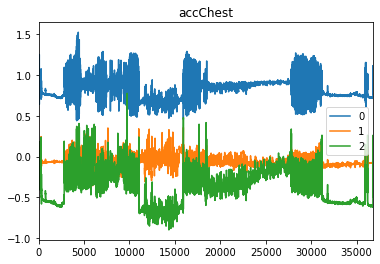

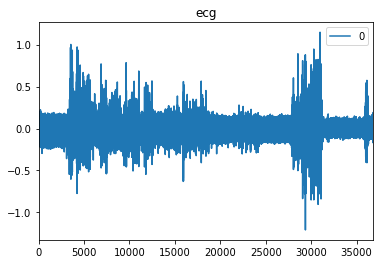

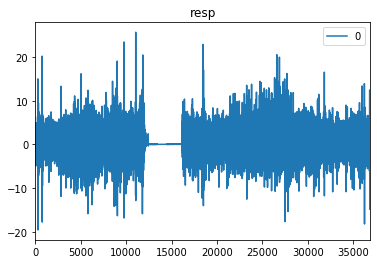

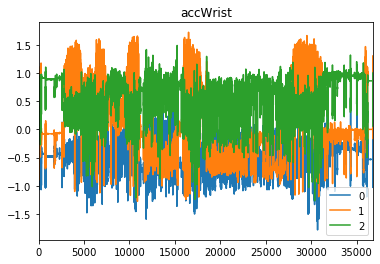

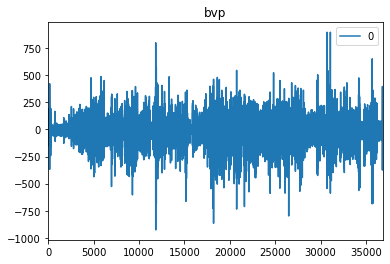

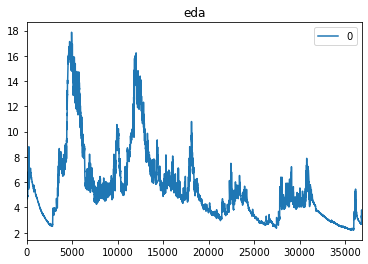

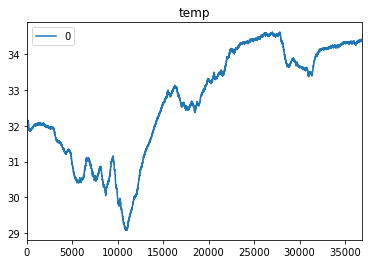

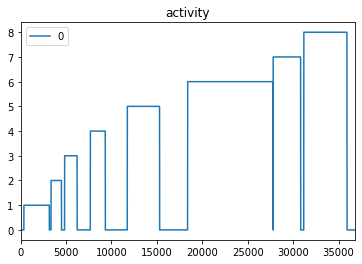

In [23]:
sampledDataFrames = []
index = 0
for data in cleanedData:
    sampledData = []
    windowSize = len(data)/dfwrist['EDA'].shape[0]
    print("window size:  " + str(windowSize))
    counter = 0
    sum = 0
    for element in data:
        sum = sum + element
        counter += 1
        if counter >= windowSize:
            mean = sum / windowSize
            sampledData.append(mean)
            counter = 0
            sum = 0
    
    sampledDf = pd.DataFrame(sampledData)
    sampledDataFrames.append(sampledDf)
    sampledDf.plot(title = str(indexes[str(index)]))
    index += 1

activityDf = pd.DataFrame(dfs[3])
activityDf.plot(title = 'activity')

In [25]:
import numpy as np
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(sampledDataFrames, activityDf, test_size = 0.33, random_state=42)

ValueError: Found input variables with inconsistent numbers of samples: [7, 36848]